In [8]:
# load data
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

df = pd.read_csv('../tracks.csv')
features = df.drop(columns=[col for col in df.columns if col.startswith('label_')])
features = features.drop(columns=['track_id', 'track_name', 'track_artist']) # columns not useful. Maybe use NLP for track_name/track_artist?
features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,dance_tempo_ratio,acoustic_instrument_ratio,speech_to_instrument_ratio,energy_squared,tempo_squared,valence_squared,danceability_squared,dance_energy_tempo,valence_energy_loudness,acoustic_speech_live
0,0.642049,1.201614,1.367123,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927,-0.518874,...,0.221158,0.165544,0.050689,1.350841,-0.063729,-0.191017,0.603834,1.392655,-0.700445,-0.322506
1,0.490412,0.643317,0.585766,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198,-1.056268,...,0.834571,-0.500757,-0.552856,0.608778,-0.768004,0.675748,0.425218,0.204230,0.386671,-0.263970
2,0.138889,1.284529,1.100090,-0.324422,-0.436799,-0.377849,-0.519562,0.439384,0.116227,-0.822017,...,-0.150423,-0.479521,-0.521332,1.468434,0.006032,0.248429,0.031660,1.116450,-0.205410,-0.296098
3,0.435271,1.279002,0.984309,-0.050024,-0.667642,-0.377911,0.089582,-1.001795,0.039953,-0.947750,...,0.090119,-0.482891,-0.451691,1.460535,-0.066535,-0.974633,0.361589,1.286735,-0.893578,-0.301270
4,-0.033426,0.742815,0.685151,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037,-0.614172,...,-0.258868,0.023768,-0.181240,0.734685,0.004891,0.861334,-0.150795,0.591633,0.397196,-0.337570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,-1.563583,1.234780,1.641519,-0.132936,-0.449547,-0.377953,-0.799509,-1.289173,0.270929,-0.358076,...,-1.289785,-0.000406,0.416184,1.397649,0.156935,-1.108085,-1.468965,-0.212329,-1.327976,-0.313292
32829,-0.915679,0.483014,0.755423,-0.642251,-0.790531,-0.358910,1.197705,-0.474221,0.266134,2.127922,...,-0.890388,-0.500866,-0.552846,0.411711,0.152183,-0.634058,-0.977094,-0.117291,-0.593560,-0.359246
32830,-0.867431,0.676483,0.609190,-0.582041,-0.306579,-0.377948,-0.260352,-0.319809,0.264201,-0.262193,...,-0.859872,-0.166455,-0.316916,0.650441,0.150269,-0.510967,-0.936571,0.031006,-0.348593,-0.282764
32831,-0.198848,1.046839,1.123849,0.019069,-0.762256,0.188438,0.990337,-0.868829,0.264908,2.367121,...,-0.449835,-0.500869,-0.552939,1.136445,0.150968,-0.900462,-0.319474,0.787478,-0.931292,-0.331880


First, training off of labels as only the main genre, ignoring subgenre labels.

In [9]:
labels_main_only = df[[col for col in df.columns if col.startswith('label_')]]
labels_main_only = labels_main_only.idxmax(axis=1).apply(lambda x: x.replace('label_', '').split('_')[0])
labels_main_only

0        pop
1        pop
2        pop
3        pop
4        pop
        ... 
32828    edm
32829    edm
32830    edm
32831    edm
32832    edm
Length: 32833, dtype: object

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels_main_only, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nClassification Report for each label:\n", classification_report(y_test, y_pred))

Accuracy Score:  0.5602253692705954

Classification Report for each label:
               precision    recall  f1-score   support

         edm       0.65      0.69      0.67      1218
       latin       0.51      0.41      0.46      1033
         pop       0.38      0.34      0.36      1081
         r&b       0.49      0.50      0.49      1031
         rap       0.60      0.64      0.62      1168
        rock       0.68      0.75      0.71      1036

    accuracy                           0.56      6567
   macro avg       0.55      0.56      0.55      6567
weighted avg       0.55      0.56      0.56      6567



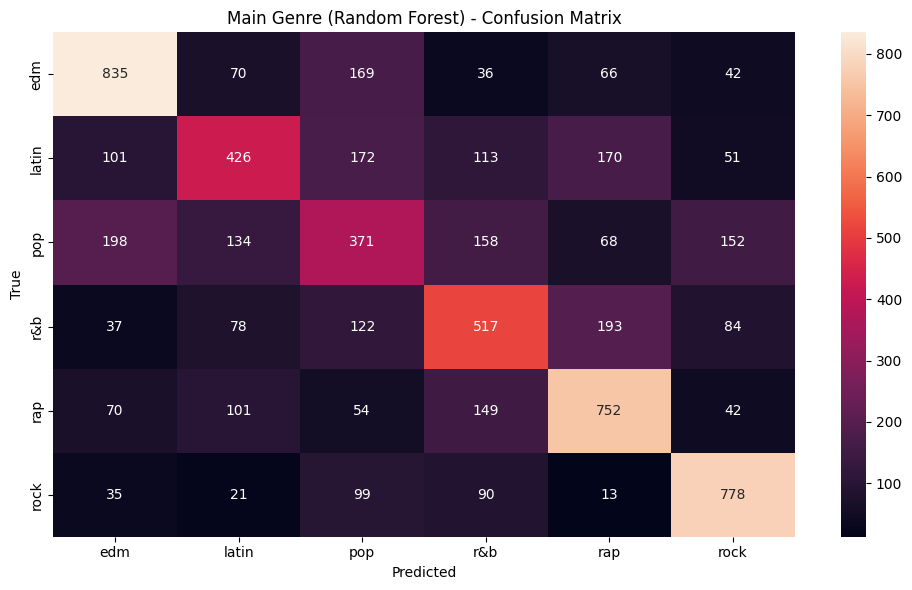

In [12]:
from matplotlib import pyplot as plt
import sklearn.metrics
import seaborn as sns

cm = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=rf.classes_)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Main Genre (Random Forest) - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

The accuracy score of the base model with main genre only is
```
Accuracy Score:  0.5523069894929191
```
Then, training the Random Forest model off of genre+subgenre labels combined into one label.

In [13]:
labels_main_and_sub = df[[col for col in df.columns if col.startswith('label_')]]
labels_main_and_sub = labels_main_and_sub.idxmax(axis=1).apply(lambda x: x.replace('label_', ''))
labels_main_and_sub

0                        pop_dance pop
1                        pop_dance pop
2                        pop_dance pop
3                        pop_dance pop
4                        pop_dance pop
                     ...              
32828    edm_progressive electro house
32829    edm_progressive electro house
32830    edm_progressive electro house
32831    edm_progressive electro house
32832    edm_progressive electro house
Length: 32833, dtype: object

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, labels_main_and_sub, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nClassification Report for each label:\n", classification_report(y_test, y_pred))

Accuracy Score:  0.2518653875437795

Classification Report for each label:
                                precision    recall  f1-score   support

                 edm_big room       0.33      0.31      0.32       248
            edm_electro house       0.31      0.37      0.34       309
                  edm_pop edm       0.11      0.09      0.10       325
edm_progressive electro house       0.29      0.38      0.33       336
          latin_latin hip hop       0.15      0.14      0.14       315
              latin_latin pop       0.19      0.13      0.15       281
              latin_reggaeton       0.27      0.33      0.29       187
               latin_tropical       0.25      0.25      0.25       250
                pop_dance pop       0.10      0.10      0.10       236
               pop_electropop       0.16      0.09      0.12       299
          pop_indie poptimism       0.17      0.18      0.17       330
            pop_post-teen pop       0.12      0.11      0.11       216


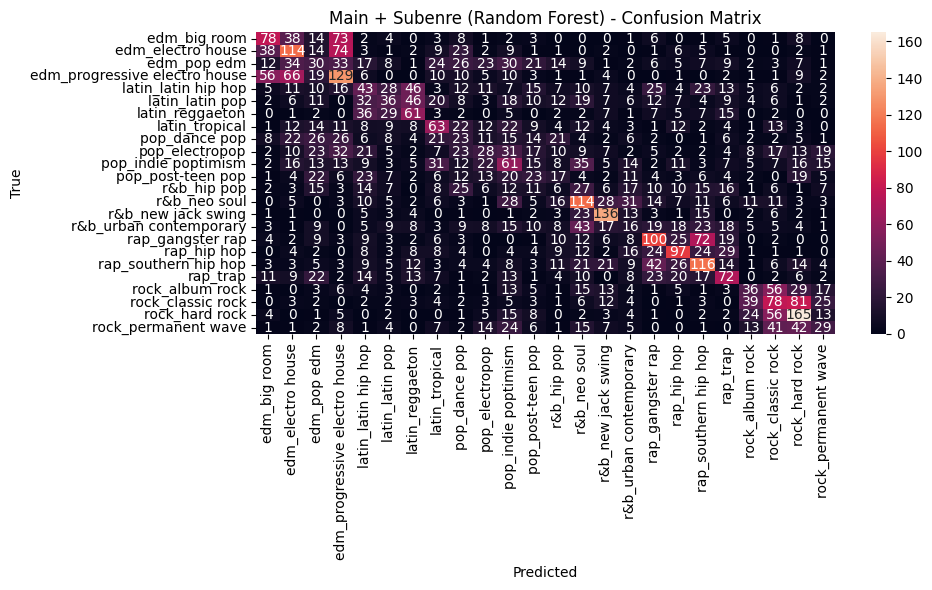

In [15]:
from matplotlib import pyplot as plt
import sklearn.metrics
import seaborn as sns

cm = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=rf.classes_)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Main + Subenre (Random Forest) - Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

For the model with genre+subgenre labels, the accuracy score is
```
Accuracy Score:  0.25140855794122124
```

Tuning:
Looking for hyperparameters via RandomizedSearchCV, first with only main genres:

In [6]:
# back to the main genre labels only
X_train, X_test, y_train, y_test = train_test_split(features, labels_main_only, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(5, 700, num=20)],
    'max_depth': [None, 20, 30, 50, 75],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=20, cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)
print("Best Parameters:", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

Took 14m54s to run, producing:
```
Best Parameters: {'n_estimators': 553, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}
Accuracy Score:  0.5550479671082686
```
Not much of an increase. Now to try with subgenres:



In [7]:
# back to the main genre labels only
X_train, X_test, y_train, y_test = train_test_split(features, labels_main_and_sub, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(5, 700, num=5)],
    'max_depth': [None, 30, 75],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=15, cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)
print("Best Parameters:", random_search.best_params_)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


KeyboardInterrupt: 

```
Best Parameters: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Accuracy Score:  0.26237246840261913
```
Again, not a huge increase. This seems to be the limit for Random Forest models.